In [2]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)
# read_rmsp()
pd

0:00:00.000 ₀╷₀₀╷₀₀.₀₀₀ init()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__,_log,_o,adds,datetime,df_info
1,dfr,disp,display,draw_l,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math,merge_OKVED,np
2,os,pd,plt,read_rmsp,reload,requests,shutil,sizeof_fmt,start,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile


,name,rows,cols,memory,keys


<module 'pandas' from 'C:\\Users\\FunFam\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [1]:
!jupyter --paths --json

{"runtime": ["C:\\Users\\FunFam\\AppData\\Roaming\\jupyter\\runtime"], "config": ["C:\\Users\\FunFam\\.jupyter", "C:\\Users\\FunFam\\anaconda3\\etc\\jupyter", "C:\\ProgramData\\jupyter"], "data": ["C:\\Users\\FunFam\\AppData\\Roaming\\jupyter", "C:\\Users\\FunFam\\anaconda3\\share\\jupyter", "C:\\ProgramData\\jupyter"]}


In [37]:
tm()

*** Start at: 16:54:03 ₂₀₂₂₋₀₄₋₂₅  ************************************************************


1650894843.1572251

In [10]:
df = pd.DataFrame([[55.54,37.34],[55.541,37.341]], columns={'lotitude','longitude'})
df

,lotitude,longitude
0,55.540,37.340
1,55.541,37.341


In [3]:
def insertion_sort(array):
    # Loop from the second element of the array until
    # the last element
    for i in range(1, len(array)):
        # This is the element we want to position in its
        # correct place
        key_item = array[i]

        # Initialize the variable that will be used to
        # find the correct position of the element referenced
        # by `key_item`
        j = i - 1

        # Run through the list of items (the left
        # portion of the array) and find the correct position
        # of the element referenced by `key_item`. Do this only
        # if `key_item` is smaller than its adjacent values.
        while j >= 0 and array[j] > key_item:
            # Shift the value one position to the left
            # and reposition j to point to the next element
            # (from right to left)
            array[j + 1] = array[j]
            j -= 1

        # When you finish shifting the elements, you can position
        # `key_item` in its correct location
        array[j + 1] = key_item

    return array

def bubble_sort(array):
    n = len(array)

    for i in range(n):
        # Create a flag that will allow the function to
        # terminate early if there's nothing left to sort
        already_sorted = True

        # Start looking at each item of the list one by one,
        # comparing it with its adjacent value. With each
        # iteration, the portion of the array that you look at
        # shrinks because the remaining items have already been
        # sorted.
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                # If the item you're looking at is greater than its
                # adjacent value, then swap them
                array[j], array[j + 1] = array[j + 1], array[j]

                # Since you had to swap two elements,
                # set the `already_sorted` flag to `False` so the
                # algorithm doesn't finish prematurely
                already_sorted = False

        # If there were no swaps during the last iteration,
        # the array is already sorted, and you can terminate
        if already_sorted:
            break

    return array

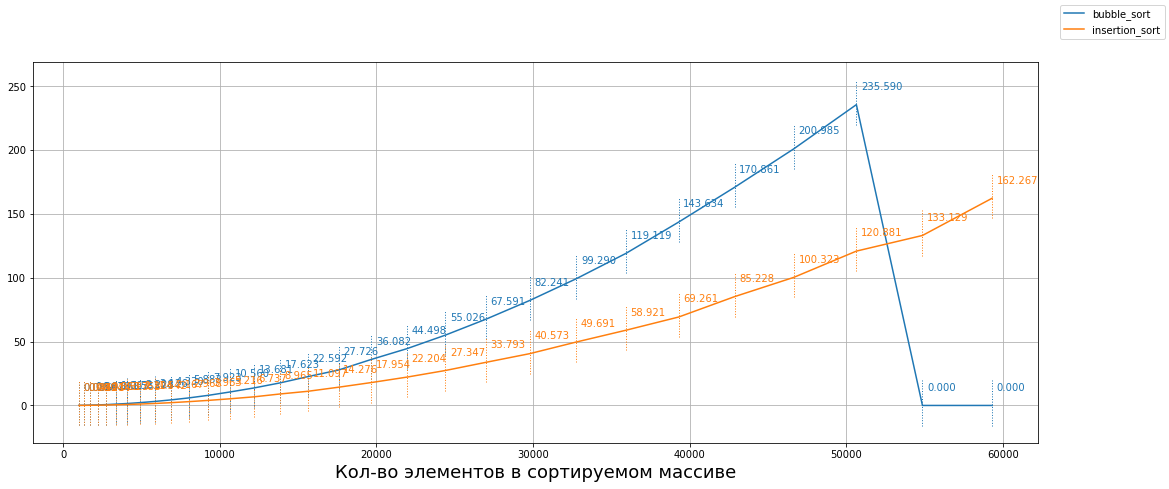

0:02:42.841 ₀╷₃₉╷₂₅.₅₇₅ ['lap 59319', {'chunk': 59319, 'bubble_sort': 0.0, 'insertion_sort': 162.26749849319458}]


,chunk,bubble_sort,insertion_sort
0,1000,0.085999,0.043996
1,1331,0.158000,0.079998
2,1728,0.266532,0.134022
3,2197,0.418000,0.214296
4,2744,0.668052,0.353110
5,3375,1.063000,0.522538
6,4096,1.532595,0.757505
7,4913,2.228011,1.103503
8,5832,3.125554,1.542040
9,6859,4.330065,2.166504


In [8]:
from random import random
from IPython.display import clear_output

tm()

tlap = []

st = 10
en = 40
for ch in [int(e**3) for e in range(st,en)]:

    t1 = time.time()
    a = [random() for _ in range(0,ch)]; 
    a1 =  a.copy()
    
    t4 = time.time()
    b = insertion_sort (a1);
    t5 = time.time()
    
    t2 = time.time()
    if (ch <= int(((en-3)**3))): b = bubble_sort (a)   #  > 12000 слишком долго поэтому не сортируем
    t3 = time.time()

    timing = {'chunk':ch, 'bubble_sort':t3-t2, 'insertion_sort':t5-t4}
    tlap = tlap + [timing]
    
    df = pd.DataFrame(tlap) 
    
    df.to_pickle('sorting_compare_%s_%s.pcl'%(st,en))
    
    clear_output(wait=True)
    draw_plot(df)

    tm(['lap %s'%ch,timing])
    
    disp(df)

In [ ]:
def draw_plot (df):
    plt.rcParams["figure.figsize"] = (18,7)
    fig,ax = plt.subplots()


    sort_keys = df.iloc[:,1:].keys()

    ax.grid()

    xcoords = df['chunk']

    max_y = df[sort_keys].max().max()
    max_x = df['chunk'].max()


    #     plt.show()    
    for k in sort_keys:
        line, = ax.plot(df['chunk'],df[k] )
        c = line.get_color()

        for i,xc in enumerate(xcoords):
    #         print (k,xc,)
            y = list(df[k])[i]
            ax.text(xc+max_x/200,y+max_y/20,"%0.3f"%y, color=c)
            ax.vlines(xc, lw=1, ls=':', ymin=y-max_y/15, ymax=y+max_y/12, color=c)
    fig.legend(sort_keys);

    plt.xlabel('Кол-во элементов в сортируемом массиве', fontsize=18)

#     for i,xc in enumerate(xcoords):
#         y = list(df[k])[i]
#         ax.axvline(xc, lw=1, ls=':', ymin=0, ymax=y*1.1)
    plt.show()
    
draw_plot(df)     

In [414]:
# 2022-04-26 Test optimal save
tm()

lbase = 2

row = ""
lap_size = 1
ch_row=[]
ch_lap = time.time()

last=time.time()
fname = 'rabbit.txt'

try: os.remove(fname)
except OSError: pass


for s in range(0,7):
    for ch in [lbase**c for c in range(2, int(50/lbase)) ]:
        for lap in range (0,100000):

            now = time.time()
            row = row + "%s,%s,%s,%s\n"%(lap,int(lap/lap_size), lap_size, (now - last))           
            last = now

            if (lap % ch == 0 ):
                with open(fname, 'a') as file:
                    file.write(row)
                    row = ""

        ch_row = ch_row + [{"step":str(s), "ch":str(ch), "t":(time.time() - ch_lap)*1000} ]
        ch_lap = time.time()

    tm([s,ch,'>>>>'])    

# df = pd.read_csv(fname, names=['lap','save','lap_size','delt'], header=None)

tm()   

df = pd.DataFrame(ch_row )

df.to_pickle('file_save_by_block.pcl')

draw(df)
tm('>>>')

,chunk,bubble_sort,insertion_sort
0,125,0.001047,0.000998
1,216,0.008029,0.004005
2,343,0.015997,0.011008
3,512,0.026046,0.013000
4,729,0.050378,0.027003
5,1000,0.114244,0.048235
6,1331,0.236393,0.102852
7,1728,0.423256,0.167000
8,2197,0.585748,0.293219
9,2744,1.085516,0.533198


In [102]:
import random
import sys
import math

latitude = 55.69
longitude = 37.347

def generate_random_data(lat, lon, num_rows, speed=[1,1]):
    latlng = []
    for i in range(num_rows):

        hex1 = '%012x' % random.randrange(16**12) # 12 char random string
        flt = float(random.randint(0,100))
        dec_lat = random.random()/100
        dec_lon = random.random()/100
        
        lon = lon+dec_lon+speed[0]/10000000*i
        lat = lat+dec_lat+speed[1]*i/10000000
        
        pvars = (hex1.lower(), flt, lon, lat) 
        
        latlng = latlng + [[lat,lon]]
        
#         print ('%s %.1f %.6f %.6f \n' % (hex1.lower(), flt, lon+dec_lon, lat+dec_lat))
    return latlng

generate_random_data(latitude, longitude, 5)


0
1
2
3
4


[[55.69195003600793, 37.347961312745696],
 [55.69544672135565, 37.34922673044413],
 [55.70075159173079, 37.35154734714224],
 [55.70091134675211, 37.36088977685564],
 [55.7103671929266, 37.362339187867775]]

In [154]:
from matplotlib.collections import PatchCollection
circles = []
cmap = plt.cm.get_cmap('jet')
print(cmap(.5))
cmap
tuple([int(x*256) for x in cmap(10)])

(0.4901960784313725, 1.0, 0.4775458570524984, 1.0)


(0, 0, 173, 256)

In [156]:
print('#%02x%02x%02x' % tuple([int(x*256) for x in cmap(10)][:-1]))

#0000ad


In [ ]:
# https://nbviewer.org/github/python-visualization/folium/tree/main/examples/

import random
import sys
import math

tm()

latitude = 55.69
longitude = 37.347

def generate_random_data(lat, lon, num_rows, speed=[1.0,1.0]):
    latlng = []
    for i in range(num_rows):

        hex1 = '%012x' % random.randrange(16**12) # 12 char random string
        flt = float(random.randint(0,100))
        dec_lat = random.random()/100
        dec_lon = random.random()/100
        
        nlon = lon+dec_lon+speed[0]/10000*i
        nlat = lat+dec_lat+speed[1]/10000*i
                
        pvars = (hex1.lower(), flt, nlon, nlat) 
        
        latlng = latlng + [[nlat,nlon]]
        
#         print ('%s %.1f %.6f %.6f \n' % (hex1.lower(), flt, lon+dec_lon, lat+dec_lat))
    return latlng

coordinates = generate_random_data(latitude, longitude, 2000, [2,0.1])
# print (coordinates)

center = coordinates[0]

# Create the map and add the line
m = folium.Map(location=center, zoom_start=11)

oc = 0;

my_PolyLine = ""

for i,c in enumerate(coordinates):
    
    if (oc != 0):
        l = len(coordinates)
        color = '#%02x%02x%02x' % tuple([int(x*255) for x in cmap(((i*10)%l)/l)][:-1])
#         color = 'red'
#         print (color)
        my_PolyLine=folium.PolyLine(locations=[c,oc],weight=2,color=color)
        m.add_child(my_PolyLine)
#         print ([c,oc])
    oc = c

tm('>>>>')
m


In [47]:
# 2022-04-05 Folio map https://python-visualization.github.io/folium/quickstart.html#Getting-Started 

import folium

df = pd.DataFrame([[55.692,37.347],[55.691,37.348]], columns={'latitude','longitude'})

center = df[["longitude","latitude"]][:1]

m = folium.Map(
    location=df[["longitude","latitude"]][:1],
    tiles='cartodbpositron',
    zoom_start=17,
)

m.add_child(folium.LatLngPopup())

df.apply(lambda row:folium.CircleMarker(location=[row["longitude"], row["latitude"]]).add_to(m), axis=1)


folium.Marker([55.692,37.347], popup="Camp Muir").add_to(m)

m.add_child(folium.ClickForMarker(popup="Waypoint"))

m

In [51]:
import os
import datetime
from ipywidgets import interact

app_id, app_code = map(os.getenv, ["HEREMAPS_APP_ID", "HEREMAPS_APP_CODE"])

tile_formats = "png8 png jpeg".split()
map_types = "base aerial pano traffic".split()
tile_types = """
    maptile traffictile flowbasetile trucktile rcdistonlytile
    mapnopttile blinetile alabeltile
""".strip().split()
languages_3 = "eng ger fre ita gre rus ara hin chi ---".split()

schemes = """
    normal.day normal.day.grey normal.day.transit normal.night
    normal.day.mobile
    pedestrian.day pedestrian.day.mobile
    carnav.day.grey
    normal.traffic.day
    reduced.night
    satellite.day
    hybrid.day
    wrong
""".strip().split()


class HereMap(object):
    def draw(self, map_type, tile_type, scheme, tile_format, language,
             lat, lon, zoom=10, show_url=False):
        "Draw a HERE map. Default values are given as parameter keyword values."
        
        # raise error for not allowed combinations
        if scheme == "wrong":
            raise Exception("Combination not allowed")
        
        # set parameter defaults for map tiles to request
        number = '1' # (1-4)
        map_version = "newest" # or some hex hash value
        server_env = "" # production, or "cit." for "customer integration test"
        tile_size = "256"

        # build map tiles URL
        server = "https://{number}.{map_type}.maps.{server_env}api.here.com"
        path = "/maptile/2.1/{tile_type}/{map_version}/{scheme}/{{z}}/{{x}}/{{y}}/{tile_size}/{tile_format}"
        query = "?app_id={app_id}&app_code={app_code}"
        if language != "---":
            query += "&lg={language}"
        params = dict(number=number, map_type=map_type, tile_type=tile_type,
            scheme=scheme, tile_format=tile_format, tile_size=tile_size,
            map_version=map_version, server_env=server_env,
            app_id=app_id, app_code=app_code,
            language=language
        )
        tiles_url = (server + path + query).format(**params)

        # set map attribution text
        year = datetime.datetime.now().year
        attr = 'Data by <a href="http://developer.here.com">HERE.com</a>, %s' % year

        if show_url:
            print(tiles_url)

        # build and return a map
        return folium.Map(
            location=(lat, lon),
            tiles=tiles_url,
            zoom_start=zoom,
            attr=attr
        )

hmap = HereMap()
interact(hmap.draw, map_type=map_types, tile_type=tile_types, scheme=schemes,
         tile_format=tile_formats, language=languages_3, lat=55.69, lon=37.347, zoom=(1, 18), show_url=False)

interactive(children=(Dropdown(description='map_type', options=('base', 'aerial', 'pano', 'traffic'), value='b…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [49]:
# ~ 2022-04-28



    plt.rcParams["figure.figsize"] = (20,10)
#     plt.grid(color='black', which='major', linestyle='solid')

    df_pivot = pd.read_csv("between_1x2.csv",names = ["step","dbtype","t","tm","x2","n"])
    
    disp(df_pivot[:2])

    fig,ax1 = plt.subplots()

    ax2 = ax1.twinx()

    ax1.plot(df_pivot['step'], df_pivot[['numeric']], label='numeric',linewidth=5.0)
    ax2.plot(df_pivot['step'], df_pivot[['float4','float8','double precision']])

#     plt.grid(color='black', which='major', linestyle='--',  axis='both')
    
    ax1.xaxis.grid(True,  linestyle='--')    
    ax1.yaxis.grid(True,  linestyle='--')
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)
    
    plt.show()
    tm (step)

IndentationError: unexpected indent (Temp/ipykernel_25112/932206506.py, line 5)

In [57]:
#!/usr/bin/env python
import pika
import sys
import json

connection = pika.BlockingConnection(pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

message = {
"carNumber":"A999MM000",
"lat": 58.556686,
"lon": 31.27049,
"hdop":0,
"speed":0,
"engine": 1,
'createdAt': tm()
}


message = {
"createdAt": tm()
}


# message = str(message)

channel.basic_publish(exchange='logs', routing_key='', body=json.dumps(message))
print(" [x] Sent %r" % message)
connection.close()

*** Start at: 17:24:32 ₂₀₂₂₋₀₄₋₂₅  ************************************************************
*** Start at: 17:24:32 ₂₀₂₂₋₀₄₋₂₅  ************************************************************
 [x] Sent {'createdAt': 1650896672.4368632}


0.202,0.205,0.217,0.207,0.205,0.204,0.205,0.202,0.207,0.235,0.221,0.222,0.221,0.234,0.235,0.221,0.236,0.236,0.222,0.252,0.252,0.253,0.252,0.252,0.252,0.252,0.251,0.251,0.253,0.265,0.266,0.268,0.267,0.269,0.268,0.267,0.268,0.270,0.270,0.282,0.283,0.285,0.296,0.294,0.285,0.285,0.284,0.283,0.283,0.312,0.317,0.315,0.313,0.315,0.313,0.312,0.316,0.314,0.315,0.330,0.331,0.330,0.330,0.331,0.327,0.330,0.329,0.331,0.332,0.348,0.345,0.347,0.348,0.345,0.346,0.345,0.348,0.346,0.348,0.360,0.377,0.362,0.376,0.361,0.376,0.375,0.374,0.362,0.378,0.392,0.394,0.395,0.390,0.392,0.393,0.392,0.392,0.397,0.390,0.408,0.409,0.403,0.407,0.408,0.410,0.410,0.409,0.406,0.409,0.420,0.422,0.424,0.422,0.425,0.424,0.424,0.425,0.425,0.424,0.453,0.453,0.452,0.455,0.454,0.442,0.442,0.442,0.456,0.448,0.466,0.472,0.472,0.472,0.473,0.474,0.471,0.470,0.467,0.471,0.484,0.485,0.484,0.485,0.486,0.486,0.488,0.485,0.492,0.489,0.201,0.205,0.202,0.203,0.204,0.204,0.204,0.203,0.204,0.202,0.235,0.235,0.222,0.234,0.222,0.222,0.221,0.23

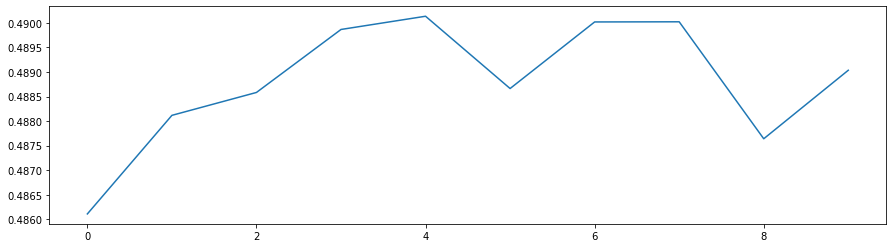

In [175]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

connection = pika.BlockingConnection(pika.ConnectionParameters(host='localhost'))
channel = connection.channel()
channel.exchange_declare(exchange='logs', exchange_type='fanout')



start = 0

channel.basic_publish(exchange='logs', routing_key='', body=json.dumps({"clear":1}))

for c in range(0,10):
    time.sleep(3)

    for send_delay in range(200,500,20):
        laps = []
        lap = time.time()

        for i in range(0,10):


            if (start == 0):
                start = 1
            else:    
                time.sleep(send_delay/1000)

                now = time.time()
                delt =now -  lap
                lap = now
                laps = laps + [delt]

                message = {
                "i":i,
                "createdAt": lap,
                "delay":send_delay,
                "clear":0
                }


                print ("%0.3f"%delt, end=',')


                channel.basic_publish(exchange='logs', routing_key='', body=json.dumps(message))

    
    
connection.close()    


# clear_output(wait=True)

plt.figure(figsize=(15,4))
plt.plot(laps)
plt.show()


In [146]:
# .gitignore you can skip this first one if it is not already excluded by prior patterns
*00
*/
!*.ipynb
!*.py

! git status  
! git status --ignored  
! git ls-tree -r HEAD   # отслеживаемые файлы
! git commit -m "2022-04-12 POI route"
! git push -u orgin master


SyntaxError: invalid syntax (Temp/ipykernel_15356/1186233589.py, line 3)

In [3]:
#2022-04-15 Mongo connections

from pymongo import MongoClient


client = MongoClient('localhost', 27017)
print(client)

db = client.database_name
collection = db.collection_name
collection.find_one({"name":"name1"})    
    

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [148]:
print("\n".join([ ",".join(x)  for x in data ]))

2022-04-15,А627СУ 777,1200
2022-04-13,К703РН 77,120
2022-04-14,А286УО 99,800
2022-04-13,В069НЕ 99,120
2022-04-14,Р688КК 97,1200
2022-04-10,Н589АН 177,1200
2022-04-11,С328ВВ 777,1200
2022-04-10,М067КТ 799,650
2022-04-13,Н279ОР 197,510
2022-04-10,Х557КТ 177,800
2022-04-14,Х118СВ 197,120
2022-04-14,У550ХК 97,710
2022-04-10,М162МР 199,300
2022-04-11,Н242ТС 199,710
2022-04-14,М772УВ 177,240
2022-04-12,Н560ЕО 799,300
2022-04-12,Е895ХК 77,240
2022-04-10,К056ОО 77,300
2022-04-11,В078СН 99,1200
2022-04-13,Н647ТТ 77,800


In [ ]:
print ("\n".join(",".join(data)) )  

In [147]:
#2022-04-14 генератор номеров
import random

regnum_letters = 'А,В,Е,К,М,Н,О,Р,С,Т,У,Х'.split(",")
region_codes = '77, 99, 97, 177, 199, 197, 777, 799, 797'.split(", ")
date_list = ['2022-04-10','2022-04-11','2022-04-12','2022-04-13','2022-04-14','2022-04-15',]

data = []

for n in range(0,20):
    summ = random.choice(summ_list)
    _date = random.choice(date_list)
    
    reg_num = random.choice(regnum_letters) +\
    "%03d"%(random.randrange(999)) +\
    "".join([random.choice(regnum_letters) for x in range(0,2)]) +\
    " "+random.choice(region_codes)
    data = data + [[_date,reg_num,summ]]

print("\n".join([ ",".join(x)  for x in data ]))

df = pd.DataFrame(data, columns = {'first_date','reg_num', 'sum'})

2022-04-15,А627СУ 777,1200
2022-04-13,К703РН 77,120
2022-04-14,А286УО 99,800
2022-04-13,В069НЕ 99,120
2022-04-14,Р688КК 97,1200
2022-04-10,Н589АН 177,1200
2022-04-11,С328ВВ 777,1200
2022-04-10,М067КТ 799,650
2022-04-13,Н279ОР 197,510
2022-04-10,Х557КТ 177,800
2022-04-14,Х118СВ 197,120
2022-04-14,У550ХК 97,710
2022-04-10,М162МР 199,300
2022-04-11,Н242ТС 199,710
2022-04-14,М772УВ 177,240
2022-04-12,Н560ЕО 799,300
2022-04-12,Е895ХК 77,240
2022-04-10,К056ОО 77,300
2022-04-11,В078СН 99,1200
2022-04-13,Н647ТТ 77,800


In [1]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))